In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
import os
from modules.TravelSurveyAnalysis import TravelSurveyAnalysis

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

## Netherlands

In [2]:
source_folder_path = data_folder + 'netherlands/'
destination_folder_path = data_folder + 'netherlands/'

In [3]:
expansion_factor_trip = 'FactorV'
expansion_factor_person = 'FactorP'
expansion_factor_family = 'FactorH'
origin_column = 'VertGem'
destination_column = 'AankGem'

dict_year_data_correspondence = {
    '2017': 'OViN2017_Databestand.csv',
    '2018': 'ODiN2018_Databestand_v2.0.csv',
    '2019': 'ODiN2019_Databestand_v2.0.csv',
}

code_column = 'CBS code'

dict_columns = {
    'Mode Share': {'column': 'KHvm',
                   'index_map': {'1': 'Passenger car - driver', '2': 'Passenger car - passenger', '3': 'Train', '4': 'Bus/tram/metro', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}},
    'Gender': {'column': 'Geslacht',
                   'index_map': {1: 'Man', 2: 'Woman'}},
    'Age': {'column': 'Leeftijd',
                   'index_map': {}}
}

dict_expansion_factor = {
      'No expansion factor': False,
      'Person expansion factor': expansion_factor_person,
      'Trip expansion factor': expansion_factor_trip,
      'Family expansion factor': expansion_factor_family
}

In [4]:
tsa = TravelSurveyAnalysis(source_folder_path, destination_folder_path,
                           expansion_factor_trip, expansion_factor_person,
                           origin_column, destination_column)

In [5]:
df_codes = tsa.read_data('list_code_municipalities_netherlands.csv')
df_codes = df_codes.set_index('Municipality')

In [6]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import ipywidgets as widgets

def build_dropdown():
    return widgets.Dropdown(options=options,
                            description=description,
                            disabled=False,
                            style= {'description_width': 'initial'},
                            layout={'width': 'max-content'}  )

options=['2017', '2018', '2019']
year = options[0]
data = tsa.read_data(dict_year_data_correspondence[year])
description='Choose a year:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global year
    year = change.new
    global data
    data = tsa.read_data(dict_year_data_correspondence[year])
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = df_codes.index
city = options[0]
city_code = str(df_codes.loc[city][code_column])
data_city = tsa.select_data_within_the_city(data, city_code)
description='Choose a city:'


drop_down = build_dropdown()

def dropdown_handler(change):
    global city
    city = change.new
    global city_code
    city_code = str(df_codes.loc[city][code_column])
    global data_city
    data_city = tsa.select_data_within_the_city(data, city_code)
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = list(dict_columns.keys())
variable = options[0]
column = dict_columns[variable]['column']
index_map = dict_columns[variable]['index_map']
description='Choose a variable:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global variable
    variable = change.new
    global column
    column = dict_columns[variable]['column']
    global index_map
    index_map = dict_columns[variable]['index_map']
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = list(dict_expansion_factor.keys())
expansion_factor = options[0]
selected_expansion_factor = dict_expansion_factor[expansion_factor]
description='Choose a expansion factor:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global expansion_factor
    expansion_factor = change.new
    global selected_expansion_factor
    selected_expansion_factor = dict_expansion_factor[expansion_factor]

drop_down.observe(dropdown_handler, names='value')
display(drop_down)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:17: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(self.source_folder_path + filename, encoding = "ISO-8859-1",


Dropdown(description='Choose a year:', layout=Layout(width='max-content'), options=('2017', '2018', '2019'), s…

Dropdown(description='Choose a city:', layout=Layout(width='max-content'), options=('All', 'Aa en Hunze', 'Aal…

Dropdown(description='Choose a variable:', layout=Layout(width='max-content'), options=('Mode Share', 'Gender'…

Dropdown(description='Choose a expansion factor:', layout=Layout(width='max-content'), options=('No expansion …

In [8]:
df = tsa.calculate_distribution(data, column, selected_expansion_factor, index_map)
df

,KHvm_new
Passenger car - driver,30.879136
On foot,25.766223
Other,16.204364
Passenger car - passenger,13.811046
Train,6.984951
Bus/tram/metro,5.523848
Bicycle,0.830432


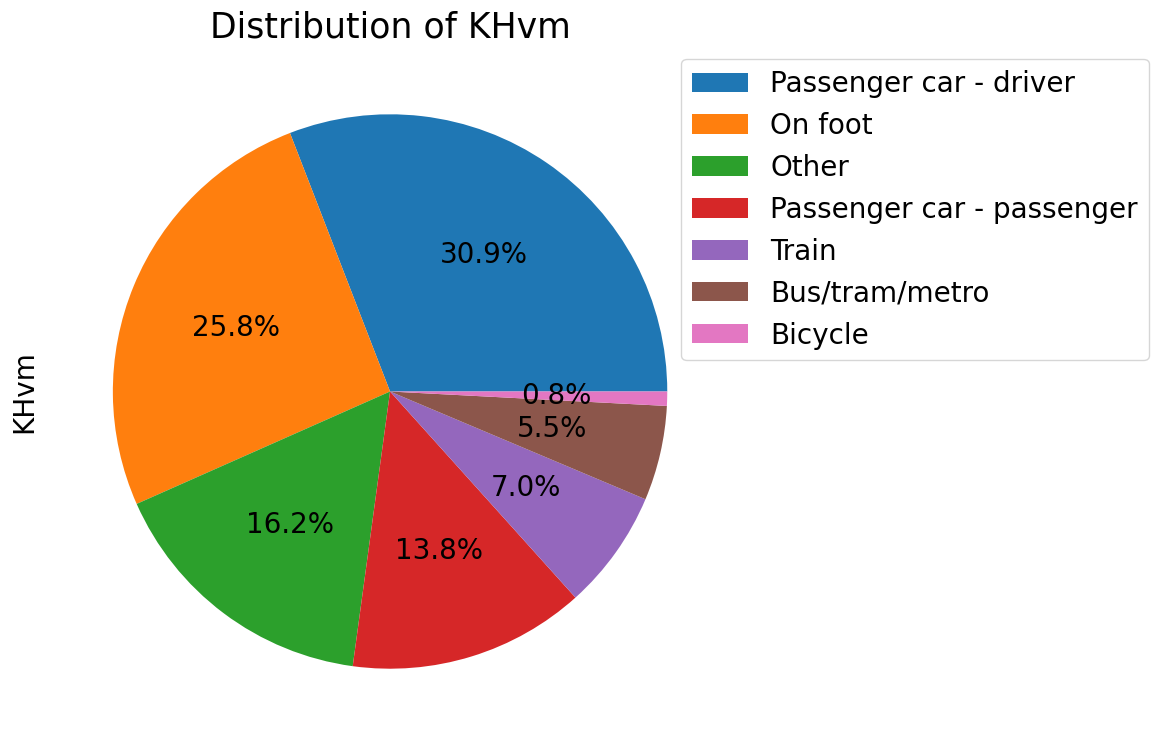

In [9]:
tsa.plot_pie_chart(data, column, selected_expansion_factor, index_map)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=20)


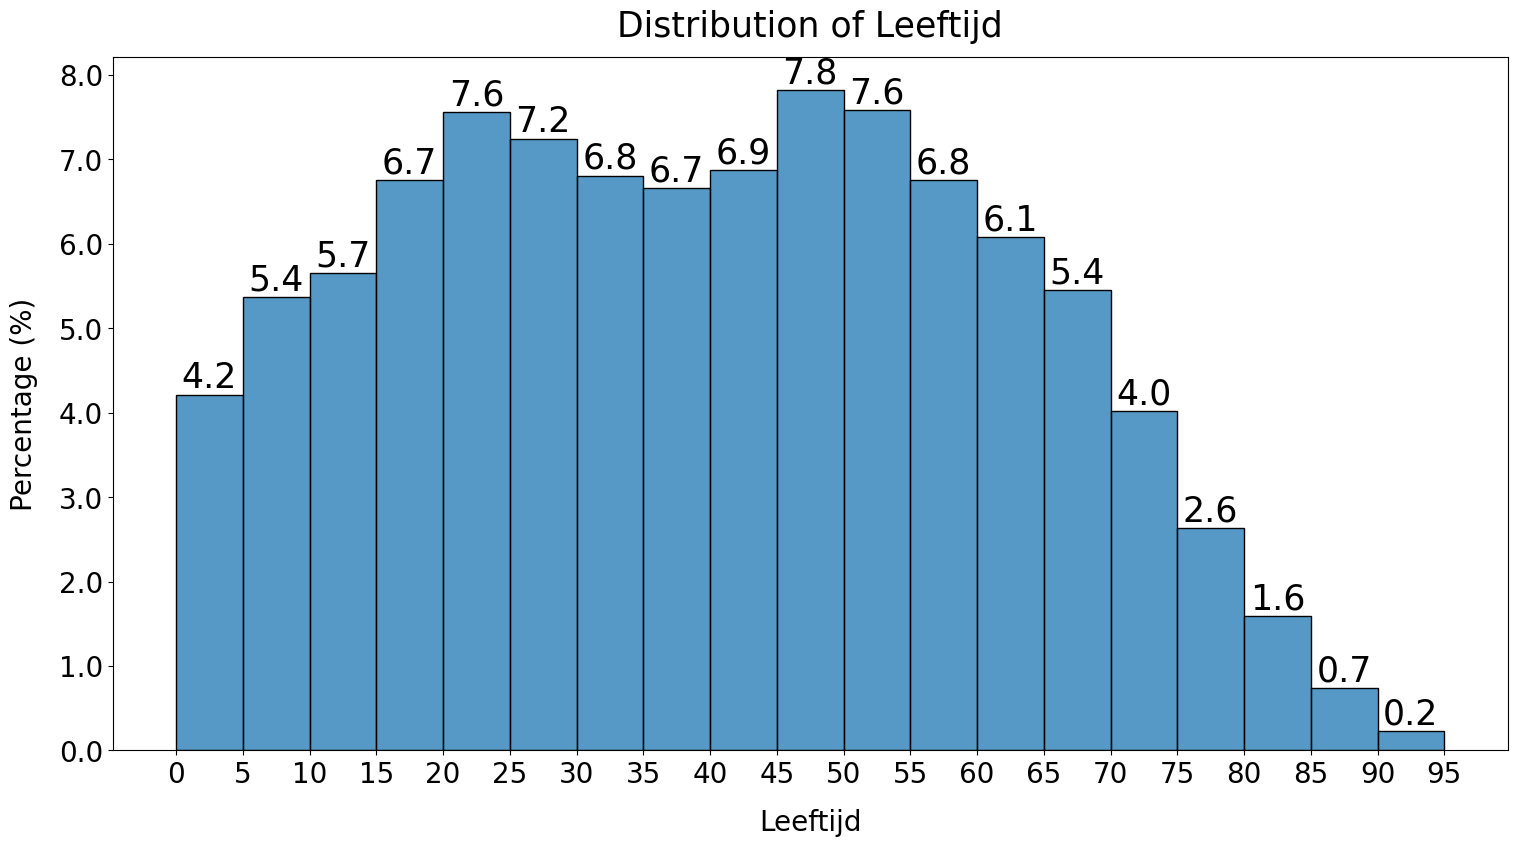

In [11]:
list_bins = list(range(0,100,5))
tsa.plot_histogram(data, column, selected_expansion_factor, list_bins)